# Stock Price Analysis of Apple and Microsoft

In [1]:
# Standard libraries
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Library for reading stock data from yahoo
import pandas_datareader.data as web

# For time stamps
import time
from datetime import datetime
from dateutil.relativedelta import relativedelta

# For division
from __future__ import division

In [2]:
# Ignore warning
import warnings
warnings.filterwarnings('ignore')

## Download data from Yahoo! Finance

In [3]:
# Download stocks from Apple and Microsoft
tech_list = ['AAPL', 'MSFT']

# Set up End and Start times and interval for data grab
end = int(round(datetime.today().timestamp()))
start = int(round((datetime.today() + relativedelta(years=-1)).timestamp()))
interval = '1d'

# For loop for grabing yahoo data and setting as a dataframe
for ticker in tech_list: 
    # URL for querying the data
    url_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={start}&period2={end}&interval={interval}&events=history&includeAdjustedClose=true'
    # Set DataFrame as the Stock Ticker
    globals()[ticker] = pd.read_csv(url_string).set_index('Date')

## Baseline Analyses

### Apple Stocks

In [4]:
# Check the dataframe
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-21,133.800003,139.669998,133.589996,136.869995,136.031387,120150900
2021-01-22,136.279999,139.850006,135.020004,139.070007,138.217911,114459400
2021-01-25,143.070007,145.089996,136.539993,142.919998,142.044327,157611700
2021-01-26,143.600006,144.300003,141.369995,143.160004,142.282852,98390600
2021-01-27,143.429993,144.300003,140.410004,142.059998,141.189590,140843800


In [5]:
# Summary statistics
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,143.093242,144.589921,141.672213,143.178459,142.840453,8.973493e+07
std,15.956822,16.248303,15.829490,16.028055,16.212816,2.864348e+07
min,119.029999,120.400002,116.209999,116.360001,115.819870,4.100000e+07
25%,129.940002,130.889999,128.800003,130.210007,129.765900,6.902310e+07
50%,143.429993,144.449997,141.690002,142.940002,142.691742,8.450580e+07
75%,149.820007,151.419998,148.699997,149.990005,149.801376,1.055755e+08
max,182.630005,182.940002,179.119995,182.009995,182.009995,1.954327e+08


In [6]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2021-01-21 to 2022-01-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


<AxesSubplot:xlabel='Date'>

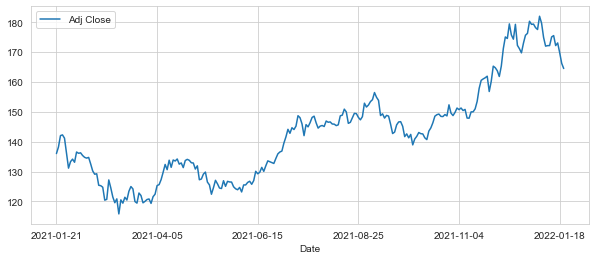

In [7]:
# Plot a historical view of the closing price
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

The graph shows the closing price of Apple stocks has significantly increased over time.

<AxesSubplot:xlabel='Date'>

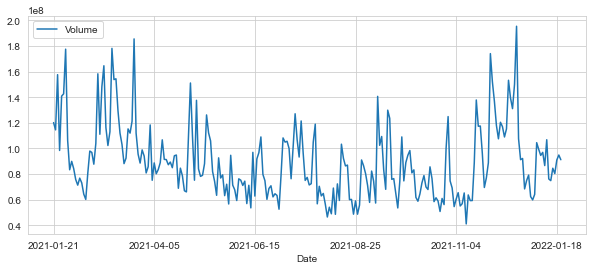

In [8]:
# Plot the total volume of stock being traded each day over the past year
AAPL['Volume'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

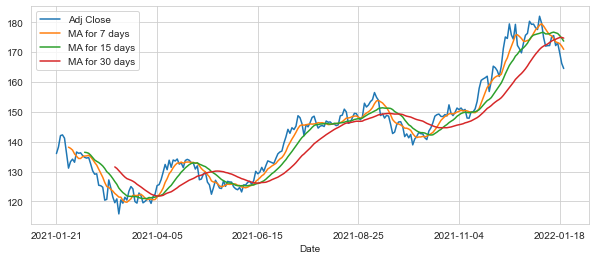

In [9]:
# Calculate the moving average (7, 15, and 30 days)
ma_day = [7, 15, 30]

for ma in ma_day:
    # Add columns of moving average for each period into the dataframe
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

AAPL[['Adj Close','MA for 7 days','MA for 15 days','MA for 30 days']].plot(subplots=False,figsize=(10,4))

### Microsoft Stocks

In [10]:
# Check the dataframe
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-21,224.699997,226.300003,222.419998,224.970001,223.099899,30709400
2021-01-22,227.080002,230.070007,225.800003,225.949997,224.071762,30172700
2021-01-25,229.119995,229.779999,224.220001,229.529999,227.621994,33152100
2021-01-26,231.860001,234.179993,230.080002,232.330002,230.398743,49169600
2021-01-27,238.000000,240.440002,230.139999,232.899994,230.964005,69870600


In [11]:
# Summary statistics
MSFT.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,280.568221,282.969842,278.154980,280.688814,279.782870,2.649164e+07
std,35.450207,35.623233,34.979190,35.318741,35.831422,8.481111e+06
min,224.699997,226.300003,222.419998,224.970001,223.099899,1.390020e+07
25%,247.759995,249.860001,245.820007,247.789993,246.376724,2.016800e+07
50%,282.350006,286.420013,280.549988,282.510010,281.455292,2.476100e+07
75%,305.019989,309.399994,302.690002,304.820007,304.662628,3.042760e+07
max,344.619995,349.670013,342.200012,343.109985,343.109985,6.987060e+07


In [12]:
# General Info
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253 entries, 2021-01-21 to 2022-01-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


<AxesSubplot:xlabel='Date'>

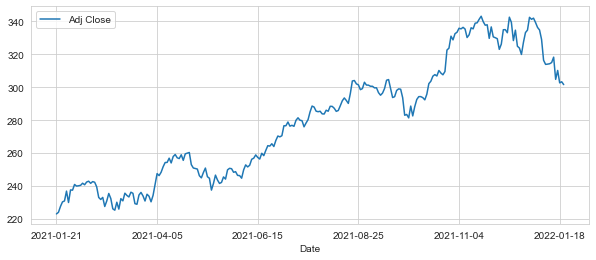

In [13]:
# Plot a historical view of the closing price
MSFT['Adj Close'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

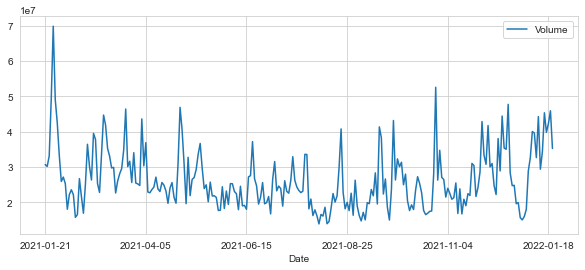

In [14]:
# Plot the total volume of stock being traded each day over the past year
MSFT['Volume'].plot(legend=True, figsize=(10,4))

<AxesSubplot:xlabel='Date'>

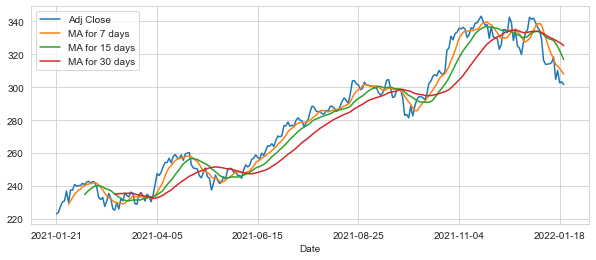

In [15]:
# Calculate the moving average (7, 15, and 30 days)
ma_day = [7, 15, 30]

for ma in ma_day:
    # Add columns of moving average for each period into the dataframe
    column_name = "MA for %s days" %(str(ma))
    MSFT[column_name] = MSFT['Adj Close'].rolling(ma).mean()

MSFT[['Adj Close','MA for 7 days','MA for 15 days','MA for 30 days']].plot(subplots=False,figsize=(10,4))

## Daily Return Analysis

### Apple Stocks

<AxesSubplot:xlabel='Date'>

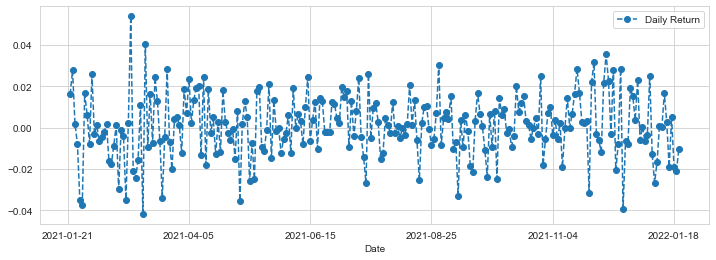

In [16]:
# Calculate the percent change of the stock each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

# Plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

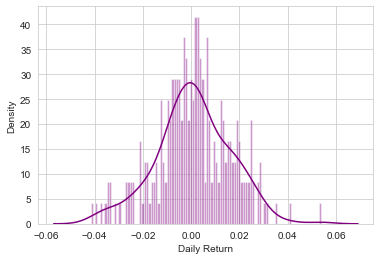

In [17]:
# Jointplot for daily return using seaborn
# NaN values can't be read by seaborn, therefore NaN value will be dropped
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

### Microsoft Stocks

<AxesSubplot:xlabel='Date'>

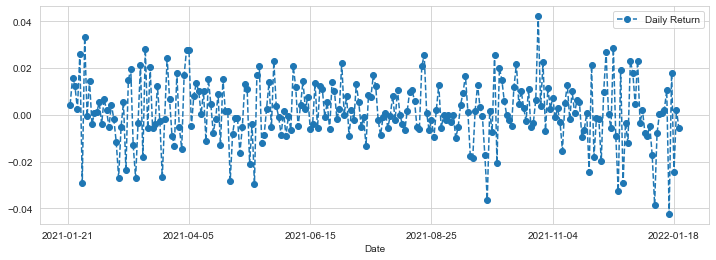

In [18]:
# Calculate the percent change of the stock each day
MSFT['Daily Return'] = MSFT['Adj Close'].pct_change()

# Plot the daily return percentage
MSFT['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--', marker='o')

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

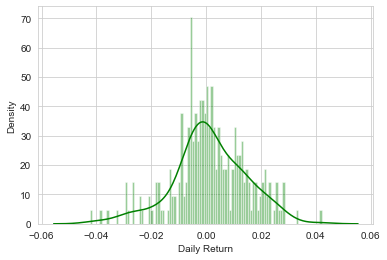

In [19]:
# Jointplot for daily return using seaborn
sns.distplot(MSFT['Daily Return'].dropna(), bins=100, color='green')

### Daily Return Comparison

In [20]:
# Rename column ['Adj Close'] in both dfs
AAPL.rename(columns={'Adj Close': 'AAPL_Adj Close'}, inplace=True)
MSFT.rename(columns={'Adj Close': 'MSFT_Adj Close'}, inplace=True)

# Concat dataframes
df_closing = pd.concat([AAPL['AAPL_Adj Close'], MSFT['MSFT_Adj Close']], axis=1)
df_closing.head()

,AAPL_Adj Close,MSFT_Adj Close
Date,,
2021-01-21,136.031387,223.099899
2021-01-22,138.217911,224.071762
2021-01-25,142.044327,227.621994
2021-01-26,142.282852,230.398743
2021-01-27,141.189590,230.964005


In [21]:
# Make a new return dataframe
df_return = df_closing.pct_change()
df_return

,AAPL_Adj Close,MSFT_Adj Close
Date,,
2021-01-21,NaN,NaN
2021-01-22,0.016074,0.004356
2021-01-25,0.027684,0.015844
2021-01-26,0.001679,0.012199
2021-01-27,-0.007684,0.002453
...,...,...
2022-01-13,-0.019028,-0.042323
2022-01-14,0.005111,0.017717
2022-01-18,-0.018894,-0.024339


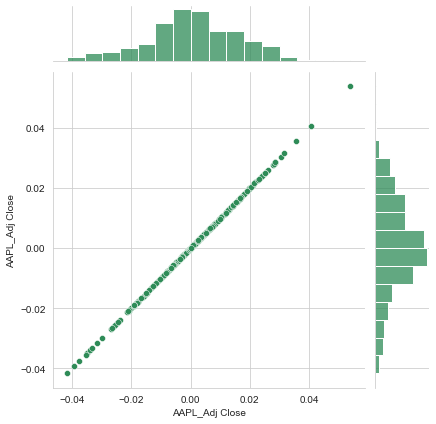

In [22]:
# Plot comparison graph of Apple to Apple which will show a perfect linear relationship
sns.jointplot('AAPL_Adj Close','AAPL_Adj Close', df_return, kind='scatter', color='seagreen')

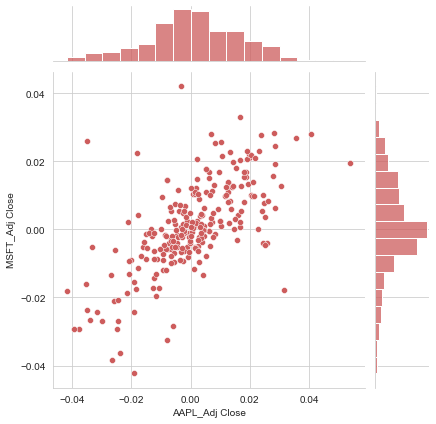

In [23]:
# Plot daily returns comparison graph of Apple to Microsoft
sns.jointplot('AAPL_Adj Close','MSFT_Adj Close', df_return, kind='scatter', color='indianred')

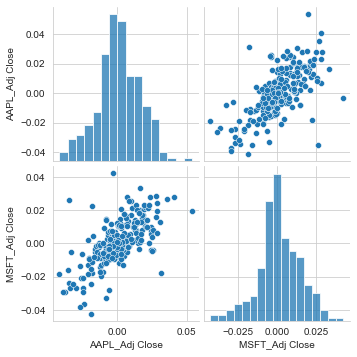

In [24]:
# Correlation Plots : Graph all relationships on daily returns between Apple and Microsoft stocks.
sns.pairplot(df_return.dropna())

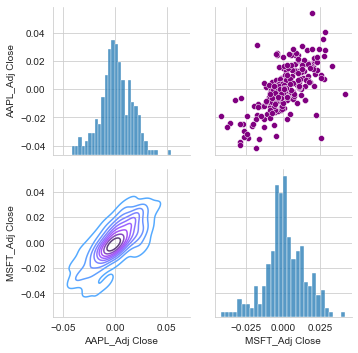

In [25]:
# Use PairGrid instead of Pairplot
returns_fig = sns.PairGrid(df_return.dropna())

# Redefine upper triangle using map_upper
returns_fig.map_upper(sns.scatterplot, color='purple')

# Redefine lower triangle using map_lower
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Define the diagonal as a series of histogram plots of the daily returns
returns_fig.map_diag(sns.histplot, bins = 30)

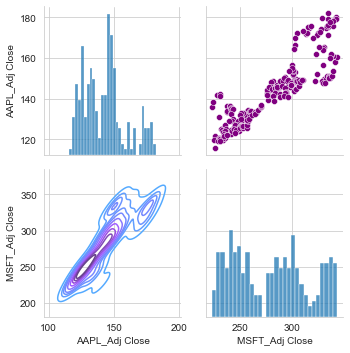

In [26]:
# Use PairGrid instead of Pairplot
returns_fig = sns.PairGrid(df_closing.dropna())

# Redefine upper triangle using map_upper
returns_fig.map_upper(sns.scatterplot, color='purple')

# Redefine lower triangle using map_lower
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Define the diagonal as a series of histogram plots of the daily returns
returns_fig.map_diag(sns.histplot, bins = 30)

## Risk Analysis

### Method 1

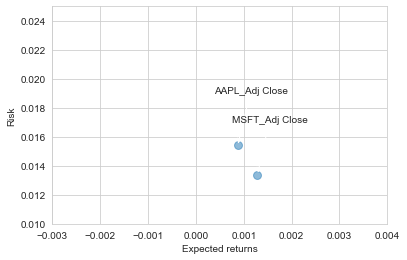

In [27]:
# Quantify thr risk by comparing the expected return with the standard deviation of the daily returns.
rets = df_return.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(), alpha = 0.5, s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, check out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3'))

### Method 2

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

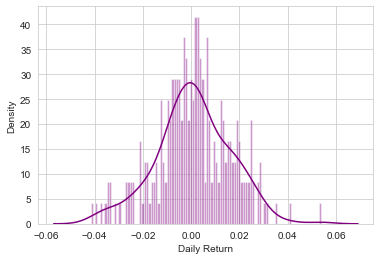

In [28]:
# Bootstrap method
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [29]:
# Use quantile to get the risk value for the stock.
# 0.05 empirical quantile of daily returns
rets['AAPL_Adj Close'].quantile(0.05)

-0.02563770267415792

Result shows that with 95% confidence, our worst daily loss will not exceed 2.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.026 * 1,000,000 = $26,000.

In [30]:
rets['MSFT_Adj Close'].quantile(0.05)

-0.023990351691234573

Result shows that with 95% confidence, our worst daily loss will not exceed 2.4%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.024 * 1,000,000 = $24,000.